In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage

import itertools
from scipy import stats

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [3]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [4]:
path_local_csv = '/Users/mharias/Documents/proyectos/covid/vacunacion/csv/'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [5]:
#datos_row = pd.read_csv(path_escovid19data_csv)

In [6]:
datos_row = pd.read_csv(path_local_csv+'estado_vacunacion_.csv')

In [7]:
dia = '23/3/21' # dia del informe
dia = datetime.today().strftime(format='%-d/%-m/%y')
un_dia = timedelta(days=1)
dia_titulo = datetime.today().strftime(format='%-d/%-m')

In [8]:
dia

'19/4/21'

In [9]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,14/4/21,País Vasco,454950.0,70900.0,148200.0,674050,564370,0.837282,412035.0,152335.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1432,14/4/21,Ceuta,10170.0,1600.0,5800.0,17570,16764,0.954126,13058.0,3706.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1433,14/4/21,Melilla,10170.0,1200.0,5800.0,17170,14706,0.856494,10849.0,3857.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1434,14/4/21,Fuerzas Armadas,19500.0,0.0,66100.0,85600,69125,0.807535,63793.0,5332.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [10]:
datos_row = datos_row[datos_row['ccaa']!='Fuerzas Armadas']

## Dashboard

In [11]:
datos = datos_row.copy()

In [12]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [13]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [14]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [15]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [16]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [17]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [18]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [19]:
lista_dias =  pd.date_range(primer_dia, end = ultimo_dia).tolist()
lista_dias = datos['date_pub'].unique().astype('datetime64[s]').tolist()

In [20]:
un_dia=timedelta(days=1)

In [21]:
n_dias = (lista_dias[-1]-lista_dias[0])

In [22]:
n_dias.days

100

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [23]:
datos.columns

Index(['date_pub', 'ccaa', 'Dosis entregadas Pfizer',
       'Dosis entregadas Moderna', 'Dosis entregadas AstraZeneca',
       'Dosis entregadas', 'Dosis administradas', '% sobre entregadas',
       'Total 1 vacuna', 'Total pauta completada',
       'Última fecha de actualización de datos',
       'Fecha de la ultima vacuna registrada', 'source_name', 'source',
       'poblacion', 'Tasa entregadas', 'Tasa administradas', 'Tasa pautas'],
      dtype='object')

In [24]:
columnas = ['poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [25]:
columns = ['Dia_entregadas','Total_entregadas',
           'Dia_administradas','Total_administradas',
           'Dia_pautas','Total_pautas']

In [26]:
indices = [i for i in itertools.product(lista_dias,datos['ccaa'].unique())]

In [27]:
tabla_row = pd.DataFrame(columns=columns,index=pd.MultiIndex.from_tuples(indices).set_names(['fecha','ccaa']))

In [28]:
for indice in range(len(lista_dias)-1):
    #print (dia)
    for comunidad in datos['ccaa'].unique():
        #print (comunidad)
        dia = lista_dias[indice+1] 
        ayer = lista_dias[indice]
        entregadas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
        entregadas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
        administradas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
        administradas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
        pautas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        pautas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        
        
        valores=[entregadas_dia,entregadas_total,
                 administradas_dia,administradas_total,
                 pautas_dia,pautas_total]
        tabla_row.loc[(dia,comunidad),columns]=valores

In [29]:
tabla = tabla_row.copy()

In [30]:
tabla.reset_index(inplace=True)

In [31]:
tabla = tabla.fillna(0)
tabla['fecha_ordinal'] = tabla['fecha'].apply(lambda x:x.toordinal()) #para poder hacer la regresión

In [32]:
#tabla = tabla[tabla['ccaa']!='España']

In [33]:
tabla

,fecha,ccaa,Dia_entregadas,Total_entregadas,Dia_administradas,Total_administradas,Dia_pautas,Total_pautas,fecha_ordinal
0,2021-01-04,Andalucía,0,0,0,0,0.0,0.0,737794
1,2021-01-04,Aragón,0,0,0,0,0.0,0.0,737794
2,2021-01-04,Asturias,0,0,0,0,0.0,0.0,737794
3,2021-01-04,Baleares,0,0,0,0,0.0,0.0,737794
4,2021-01-04,Canarias,0,0,0,0,0.0,0.0,737794
...,...,...,...,...,...,...,...,...,...
1415,2021-04-14,Navarra,0,194805,6005,167043,1491.0,50233.0,737894
1416,2021-04-14,País Vasco,0,674050,16567,564370,9423.0,152335.0,737894
1417,2021-04-14,Ceuta,0,17570,553,16764,61.0,3706.0,737894
1418,2021-04-14,Melilla,0,17170,500,14706,143.0,3857.0,737894


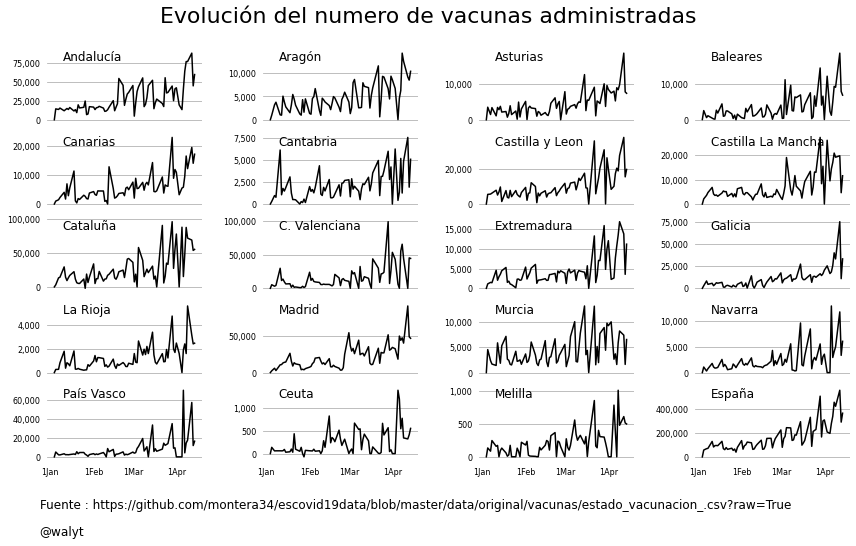

In [34]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2, 
                      margin_titles=False,height=1.5,sharey=False)

autor='@walyt'
titulo1 = 'Evolución del numero de vacunas administradas'
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
variable_draw = 'Dia_administradas'
#variable_draw = 'media_movil_7_dias'

XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    datos_ = tabla[tabla['ccaa'] == label].sort_values('fecha')
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
        
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.1, .9, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    #ax1.set_ylim(0,100)
    #ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x)))
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    ax1.plot(datos_['fecha'],datos_[variable_draw],color=color_ejes)

    
    
g.map(grafica,'ccaa')

g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.0,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.9,bottom=.14,wspace=0.4,hspace=0.15)
#plt.tight_layout()
plt.savefig(path_img+'velocidad_administradas_provincias.png',dpi=288)  

plt.show()

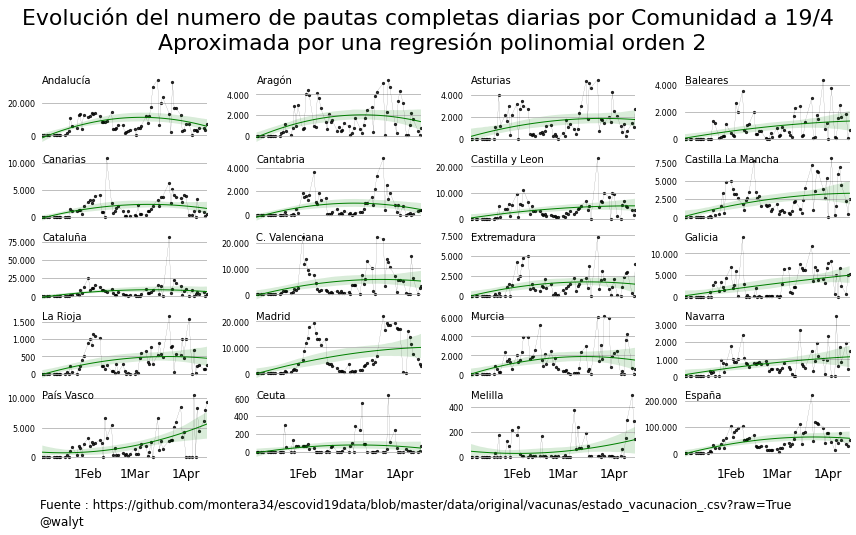

In [35]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2, 
                      margin_titles=False,height=1.5,sharey=False)


titulo1 = 'Evolución del numero de vacunas administradas'
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'


variable_draw='Dia_pautas'
titulo1 = 'Evolución del numero de pautas completas diarias por Comunidad a {}\n Aproximada por una regresión polinomial orden 2'.format(dia_titulo)



XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    datos_ = tabla[tabla['ccaa'] == label].sort_values('fecha')
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
    slope, intercept, r_value, p_value, std_err = stats.linregress(datos_['fecha_ordinal'],datos_[variable_draw])
    valor = slope * tabla.iloc[-1]['fecha_ordinal'] + intercept
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    #ax1.text(0.0, .95, label+':incremento de {:0.0f} diarias'.format(valor), weight='normal',color=color_ejes,
    #        ha="left", va="center", size=8,transform=ax1.transAxes)
    ax1.text(0.0, .95, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=10,transform=ax1.transAxes)
    #ax1.set_ylim(0,100)
    #ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    sns.regplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        order=2,
        scatter_kws={"s": 5,'color':'black'},
        line_kws={'lw':1,
                  #'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)
                 },
        color='green'
    )
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        color='black',
        lw=.1
    )
    #ax1.legend()
    
g.map(grafica,'ccaa')

g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.02,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.85,bottom=.14,wspace=0.3,hspace=0.15)
#plt.tight_layout()
plt.savefig(path_img+variable_draw+'_provincias.png',dpi=288)  

plt.show()

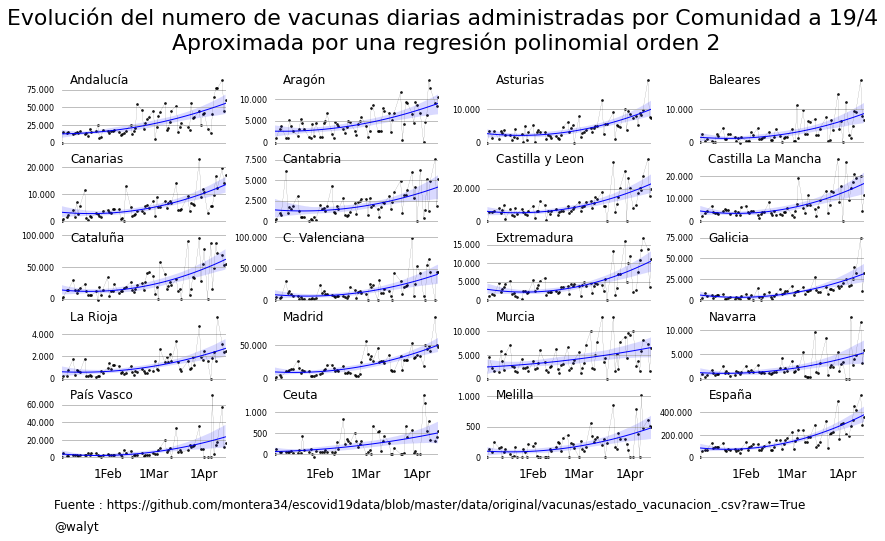

In [36]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2, 
                      margin_titles=False,height=1.5,sharey=False)


titulo1 = 'Evolución del numero de vacunas administradas a '.format(dia)
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'


variable_draw = 'Dia_administradas'
titulo1 = 'Evolución del numero de vacunas diarias administradas por Comunidad a {}\n Aproximada por una regresión polinomial orden 2'.format(dia_titulo)


XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    datos_ = tabla[tabla['ccaa'] == label].sort_values('fecha')
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
        
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.05, .95, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    #ax1.set_ylim(0,100)
    #ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    sns.regplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        order=2,
        scatter_kws={"s": 3,'color':'black'},
        line_kws={'lw':1},
        color='blue'
    )
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        #order=2,
        color='black',
        lw=.1
    )
    
g.map(grafica,'ccaa')

g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.01,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.85,bottom=.14,wspace=0.3,hspace=0.15)
#plt.tight_layout()
plt.savefig(path_img+variable_draw+'_provincias.png',dpi=288)  

plt.show()

In [37]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,Tasa entregadas,Tasa administradas,Tasa pautas
0,2021-01-04,Andalucía,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,1664.944896,306.287201,NaN
1,2021-01-04,Aragón,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,1795.510882,151.726916,NaN
2,2021-01-04,Asturias,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,2320.274129,917.545166,NaN
3,2021-01-04,Baleares,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,752.650694,12.880935,NaN
4,2021-01-04,Canarias,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,943.945452,219.551700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2021-04-14,Navarra,130605.0,20100.0,44100.0,194805,167043,0.857488,116810.0,50233.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,649966,29971.567744,25700.267399,7728.558109
1431,2021-04-14,País Vasco,454950.0,70900.0,148200.0,674050,564370,0.837282,412035.0,152335.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2178048,30947.435502,25911.733809,6994.106650
1432,2021-04-14,Ceuta,10170.0,1600.0,5800.0,17570,16764,0.954126,13058.0,3706.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843,20708.838679,19758.848697,4368.068079
1433,2021-04-14,Melilla,10170.0,1200.0,5800.0,17170,14706,0.856494,10849.0,3857.0,NaN,13/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714,20268.196520,17359.586373,4552.966452


In [38]:
datos = tabla[tabla['ccaa']=='Extremadura']
datos.loc[:,'fecha_ordinal'] = datos.loc[:,'fecha_ordinal']-737794


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
x = datos['fecha_ordinal'].values.reshape(-1,1)
y = datos['Dia_administradas'].values.reshape(-1,1)

In [40]:
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

(71, 4)

In [41]:
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(71,)

In [42]:
model.rsquared

0.47292009361930354

In [43]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     20.04
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.22e-09
Time:                        21:59:32   Log-Likelihood:                -662.08
No. Observations:                  71   AIC:                             1332.
Df Residuals:                      67   BIC:                             1341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1657.6898   1272.448      1.303      0.1

In [44]:
datos['Total_administradas'].values

array([     0,   1806,   3309,   4727,   9303,  11346,  14293,  17862,
        22322,  27613,  29125,  30941,  32039,  32979,  33125,  35441,
        37790,  39821,  41961,  47342,  49703,  52880,  56839,  61952,
        68006,  69271,  71334,  73439,  75603,  78038,  80044,  82086,
        85553,  89067,  92842,  94462,  98839, 102762, 107200, 111006,
       112229, 116392, 121286, 125191, 129802, 131804, 135670, 140186,
       144537, 148614, 151027, 156742, 156742, 170024, 171479, 174734,
       181812, 188839, 204735, 209542, 219487, 231560, 233822, 236428,
       244116, 254867, 268347, 285234, 299027, 302566, 313754])

NameError: name 'lower' is not defined

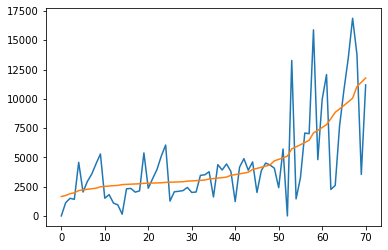

In [45]:
plt.plot(datos['Dia_administradas'].values)
plt.plot(model.predict())
plt.plot(lower)
plt.plot(upper)

In [ ]:
tabla

In [ ]:
_,upper,lower = wls_prediction_std(model)

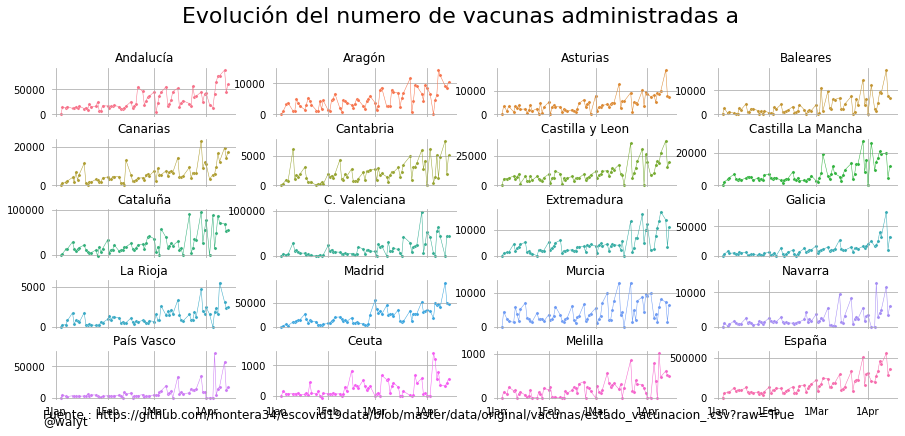

In [46]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2.5, 
                      margin_titles=False,height=1.3,sharey=False)
g.map_dataframe(sns.scatterplot, x="fecha", y="Dia_administradas",s=10)
g.map_dataframe(sns.lineplot, x="fecha", y="Dia_administradas",lw=.5)

# Título
unidad = 'administras_dia_comunidad'
#unidad = 'U. Críticas CON respirador'
#unidad = 'U. Críticas SIN respirador'
titulo1 = 'Evolución del numero de vacunas administradas a '.format(dia)
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)

color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

g.set_titles(row_template="{row_name}", col_template="{col_name}",size=12)
XmajorFmt = DateFormatter('%-d%-b')
#fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
#yticks = ticker.FormatStrFormatter(fmt)
for ax in g.axes.flat:
    
    #ax.yaxis.set_major_formatter(yticks)
    ax.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes)
    #a1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes,rotation=0)
    ax.xaxis.set_major_formatter(XmajorFmt)
    #ax.set_yticks([0,25,50,75,100])
    ax.xaxis.set_major_locator(DayLocator([1]))
    ax.grid(True,axis='both',which='both')
   


#plt.legend()
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
#g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
#g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)
g.fig.text(x=0.05,y=.1,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.085,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.85,bottom=.14,wspace=0.2,hspace=0.45)
#plt.tight_layout()
plt.savefig(path_img+unidad+'_provincias.png',dpi=288)  

plt.show()


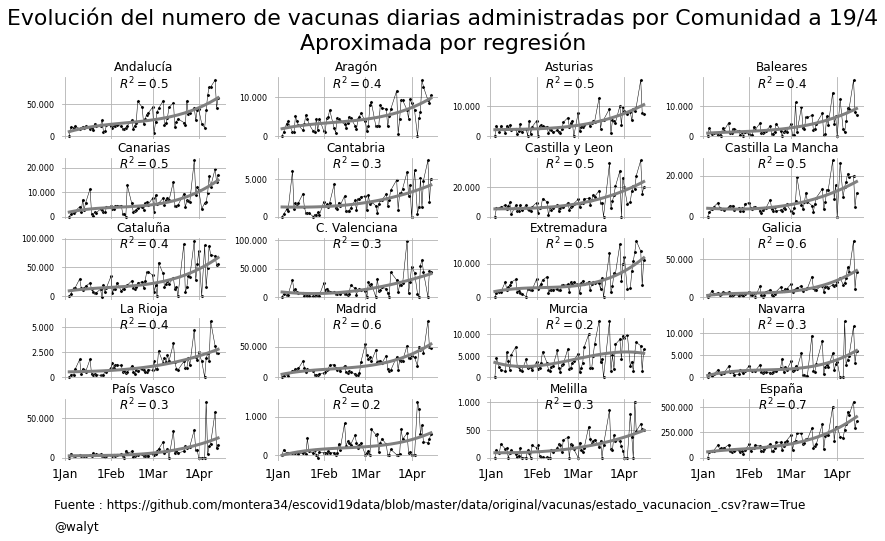

In [47]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2, 
                      margin_titles=False,height=1.5,sharey=False)


titulo1 = 'Evolución del numero de vacunas administradas a '.format(dia)
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'


variable_draw = 'Dia_administradas'
titulo1 = 'Evolución del numero de vacunas diarias administradas por Comunidad a {}\n\
Aproximada por regresión'.format(dia_titulo)


XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    datos_ = tabla[tabla['ccaa'] == label].sort_values('fecha')
    
    ### regresión 
    #datos.loc[:,'fecha_ordinal'] = datos.loc[:,'fecha_ordinal']-737794
    x = datos_['fecha_ordinal'].values.reshape(-1,1)
    x = x - 737794
    y = datos_[variable_draw].values.reshape(-1,1)
    polynomial_features= PolynomialFeatures(degree=3)
    xp = polynomial_features.fit_transform(x)
    
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp)
    datos_.loc[:,'reg'] = ypred
    
    ax1.text(.5, .9, r'$R^2 = {:0.1f}$'.format(model.rsquared), weight='normal',color=color_ejes,
            ha="center", va="center", size=12,transform=ax1.transAxes)
    
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    sns.scatterplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        s=10,
        color='black')
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        #order=2,
        color='black',
        lw=.5
    )
    
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y='reg',
        ax=ax1,
        #order=2,
        color='grey',
        lw=3
        )
    
    '''
    sns.regplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        order=2,
        scatter_kws={"s": 3,'color':'black'},
        line_kws={'lw':1},
        color='blue')
    '''
g.map(grafica,'ccaa')
g.set_titles(row_template="{row_name}", col_template="{col_name}",size=12)
#g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.01,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.85,bottom=.14,wspace=0.3,hspace=0.3)
#plt.tight_layout()
plt.savefig(path_img+variable_draw+'_provincias.png',dpi=288)  

plt.show()

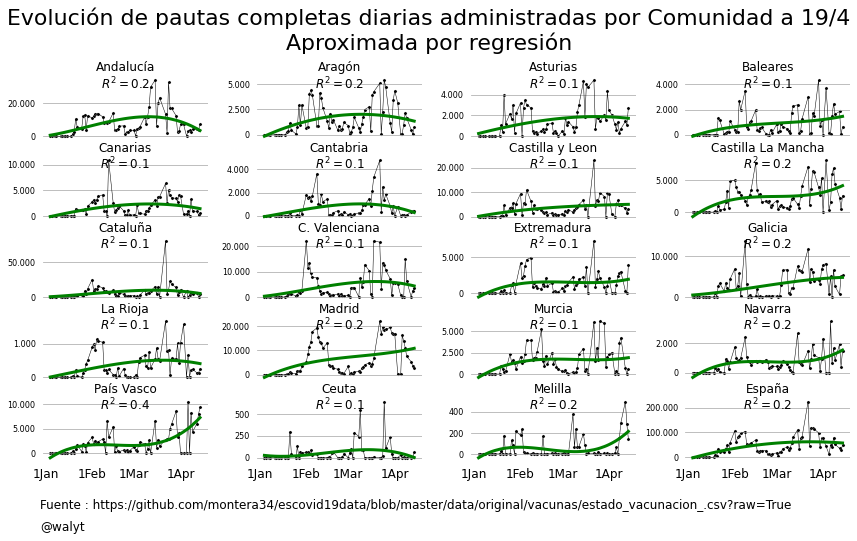

In [48]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(tabla,col='ccaa',hue='ccaa',col_wrap=4,aspect=2, 
                      margin_titles=False,height=1.5,sharey=False)


titulo1 = 'Evolución del numero de pautas completas administradas a '.format(dia)
titulo2 = 'Fuente : {}'.format(path_escovid19data_csv)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'


variable_draw = 'Dia_pautas'
titulo1 = 'Evolución de pautas completas diarias administradas por Comunidad a {}\n\
Aproximada por regresión'.format(dia_titulo)


XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    datos_ = tabla[tabla['ccaa'] == label].sort_values('fecha')
    
    ### regresión 
    #datos.loc[:,'fecha_ordinal'] = datos.loc[:,'fecha_ordinal']-737794
    x = datos_['fecha_ordinal'].values.reshape(-1,1)
    x = x - 737794
    y = datos_[variable_draw].values.reshape(-1,1)
    polynomial_features= PolynomialFeatures(degree=3)
    xp = polynomial_features.fit_transform(x)
    
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp)
    datos_.loc[:,'reg'] = ypred
    
    ax1.text(.5, .9, r'$R^2 = {:0.1f}$'.format(model.rsquared), weight='normal',color=color_ejes,
            ha="center", va="center", size=12,transform=ax1.transAxes)
    
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    sns.scatterplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        s=10,
        color='black')
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y=variable_draw,
        ax=ax1,
        #order=2,
        color='black',
        lw=.5
    )
    sns.lineplot(
        data=datos_,
        x='fecha_ordinal',
        y='reg',
        ax=ax1,
        #order=2,
        color='green',
        lw=3
    )
       
    
g.map(grafica,'ccaa')
g.set_titles(row_template="{row_name}", col_template="{col_name}",size=12)
#g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.01,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.85,bottom=.14,wspace=0.3,hspace=0.3)
#plt.tight_layout()
plt.savefig(path_img+variable_draw+'_provincias.png',dpi=288)  

plt.show()